# Linear Regression with Scikit Learn - Machine Learning with Python

![](https://i.imgur.com/1EzyZvj.png)

## Problem Statement

> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.
>
> [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


# **Downloading Data / Data Preparation**

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x108315eb0>)

In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# using decribe() to check is that the data is reasonable? Or we need additional data cleaning process.
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **EDA and Data visualization**

In [6]:
# matplotlib inline: using for show up the graphs directly under cells.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Some settings for default style and fonts for improving readable
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **1. Age, BMI, Charges** **(Using histogram, boxplot and scatterplot)**

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
# As nax - min = 46, then we will split the bin as 47.
fig = px.histogram(medical_df, x='age', marginal = 'box', nbins=47, title='Age Distribution')
fig.update_layout(bargap = 0.2)
fig.show()

In [10]:
# Why there are over twice as many customers with ages 18 and 19, compared to other ages?

# 1. Maybe there got offer if you buy the insurance with age under 20.
# 2. 18 is the eligible age in US, maybe lots of people buy insurance at 18, 19 as they able to.

In [11]:
fig = px.histogram(medical_df, x='bmi', marginal = 'box', color_discrete_sequence=['black'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x='smoker',
                   color='sex',
                   color_discrete_sequence=['blue', 'red'],
                   title='Gender Distribution of gender')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
fig = px.histogram(medical_df,
                   x='smoker',
                   color='region',
                   color_discrete_sequence=['green', 'yellow'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
# Each point shows a customer, find the relationship between age and charges by using smoker to color
# hower data means that, when we check for information about each point, we can get their sex information as well.
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
# Observations: Three "clusters" of points, all of them have a trend of increasing of charges followed by increasing of age.

# 1. First and the largest cluster consists of "healthy non-smokers" who have relatively low medical charges compared to others
# 2. Second cluster contains a mix of smokers and non-smokers. We can assume that it is become some non-smokers with medical issues" and "smokers without major medical issues".
# 3. Final cluster consists exclusively of smokers, smokers with major medical issues that are possibly related to or worsened by smoking.



In [18]:
# fig.update_traces(marker_size=5): A command of python plotly libraries to adjust the size of data points (markers) in a scatter plot.
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [19]:
# Violin plot for charges vs region (assuming region is categorical)
fig = px.violin(medical_df, y="charges", x="region", box=True, title="Charges by Region")
fig.show()

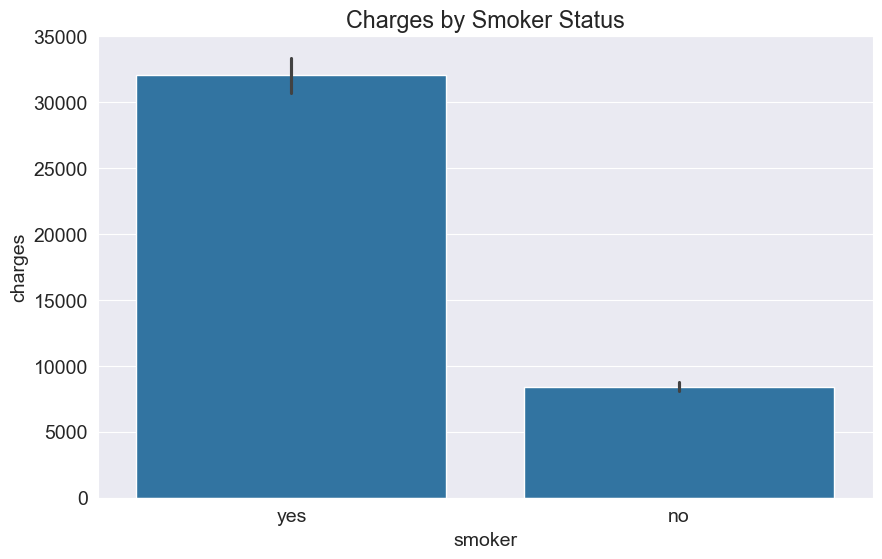

In [20]:
# Bar plot for charges vs smoker (categorical data)
sns.barplot(x="smoker", y="charges", data=medical_df)
plt.title("Charges by Smoker Status")
plt.show()

# **Correlation**

In [21]:
# The bigger value of the correlation coefficient, the stronger the relationship.
# (-1, 1), positive relationship and negative relationship.

In [22]:
# Calculate correlation for numerical data
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [23]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [24]:
# Calculation correlation for categorical data, should convert them into numeric column
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [25]:
region_values = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast' : 3 }
region_numeric = medical_df.smoker.map(region_values)
medical_df.charges.corr(region_numeric)

nan

In [26]:
# Fix the 'sex' column to be numerical for correlation calculation
medical_df['sex'] = medical_df['sex'].map({'female': 0, 'male': 1})
medical_df['smoker'] = medical_df['smoker'].map({'yes': 0, 'no': 1})
medical_df['region'] = medical_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast' : 3})

# Calculate correlation matrix
correlation = medical_df.corr()

# Print the correlation matrix
print(correlation)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469  0.025019 -0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163 -0.076185 -0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759 -0.003750 -0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000 -0.007673 -0.016569  0.067998
smoker    0.025019 -0.076185 -0.003750 -0.007673  1.000000 -0.002181 -0.787251
region   -0.002127 -0.004588 -0.157566 -0.016569 -0.002181  1.000000  0.006208
charges   0.299008  0.057292  0.198341  0.067998 -0.787251  0.006208  1.000000


In [27]:
correlation_matrix = medical_df[['age', 'bmi', 'charges', 'children']].corr()
print(correlation_matrix)

               age       bmi   charges  children
age       1.000000  0.109272  0.299008  0.042469
bmi       0.109272  1.000000  0.198341  0.012759
charges   0.299008  0.198341  1.000000  0.067998
children  0.042469  0.012759  0.067998  1.000000


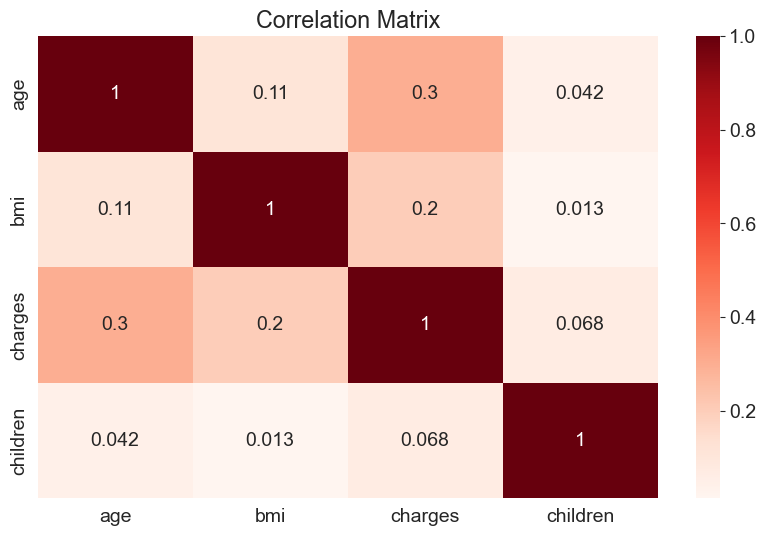

In [28]:
correlation_matrix = medical_df[['age', 'bmi', 'charges', 'children']].corr()
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

# Linear Regression with single values: AGE and **Smoker**

In [29]:
# Formula of linear regression: Y = Mx + B (Charges = w * Age + b)
# Parameters of the model: W: slope, B: intercept,
# We try to determine the slope and intercept for the line that best fit the data.
# Age is the input of the model, the value of charges we try to find called target.

In [30]:
#Estimate the value of charges using age for non-smoker
medical_df = pd.read_csv('medical.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head(5)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


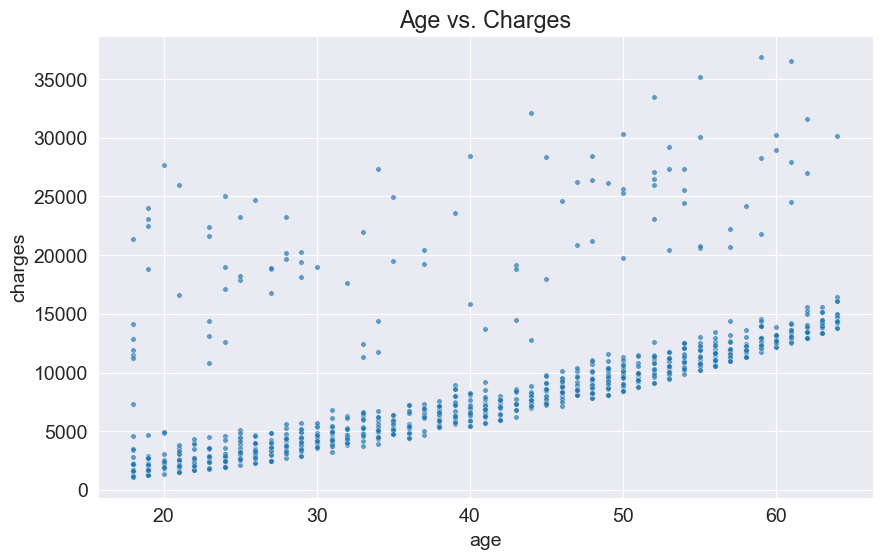

In [31]:
# Visualize relationship between age and charges
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [32]:
# Define a helper function estimate_charges, to compute charges by given age, w, and b.
def estimate_charges(age, w, b):
    return w * age + b

w = 50
b = 825
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1725
2       2225
3       2475
4       2425
5       2375
        ... 
1332    3425
1333    3325
1334    1725
1335    1725
1336    1875
Name: age, Length: 1064, dtype: int64

In [33]:
# Compared above estimated charges with actual to modify our parameters
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

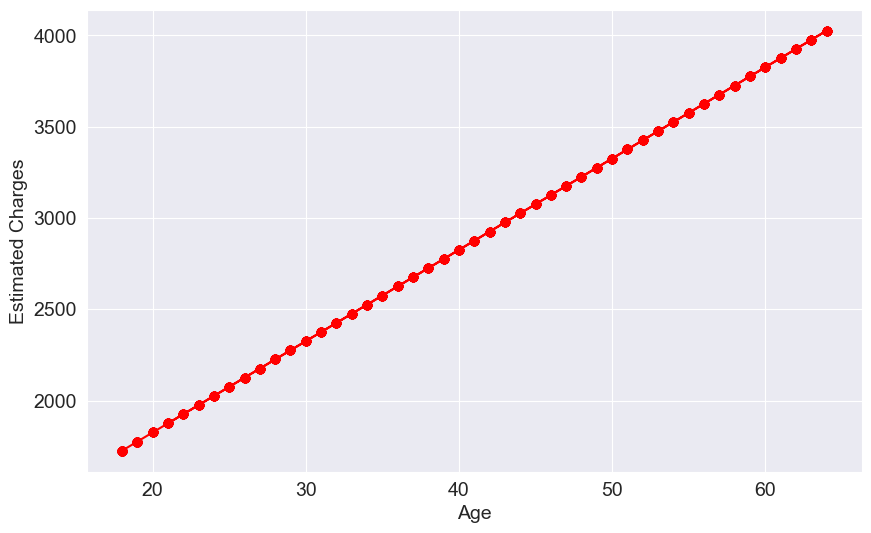

In [34]:
# Plot line graph for estimated charges.
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

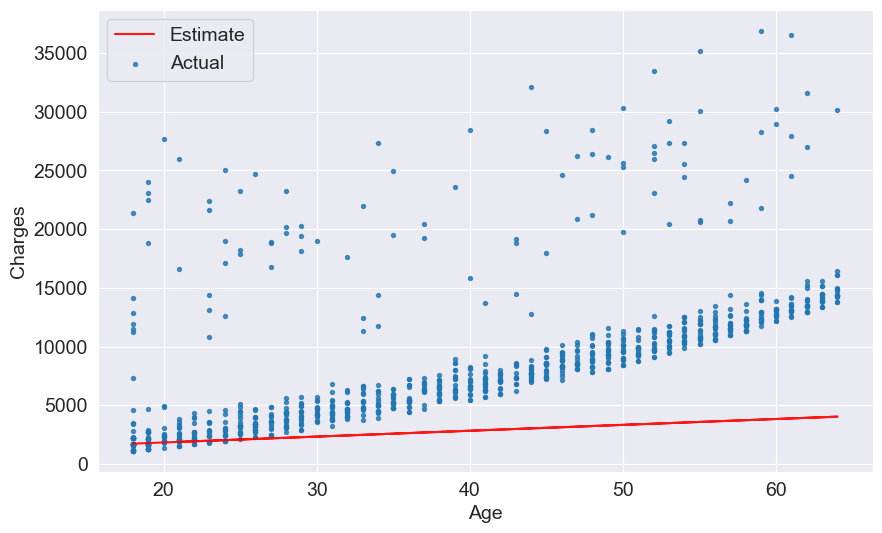

In [35]:
# Put above line with actual data we have, to see how well this line fits our data.
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

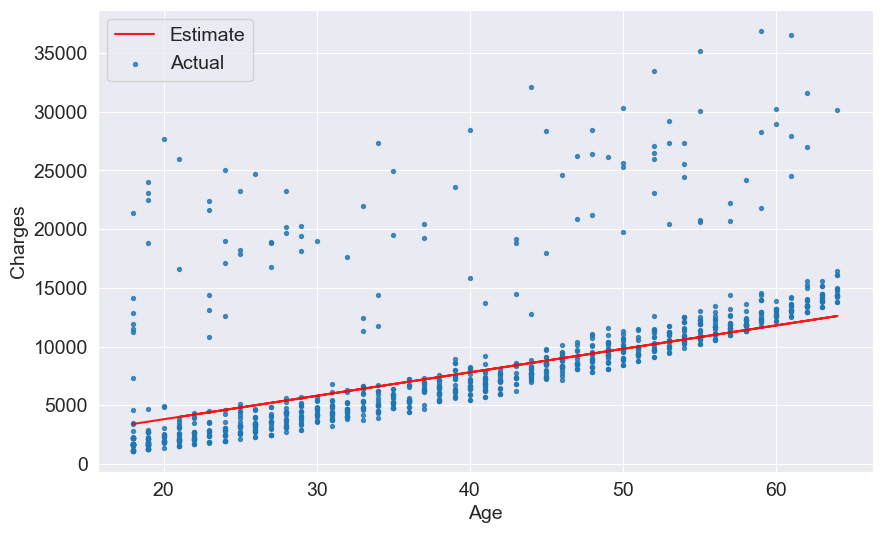

In [36]:
# Clearly, the line is not fitting our data, now we create a function and input the parameters manually.
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

# try_parameters(200, 500)
try_parameters(200, -200)

In [37]:
# Caz currently we modify the value of parameters manually, trying to move the line more closer to the points.
# Now, we need to let the computer try different values of w and b, to learn the relationships of age and charges.
# We need a way to measure numerically how well the line fits the points. Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

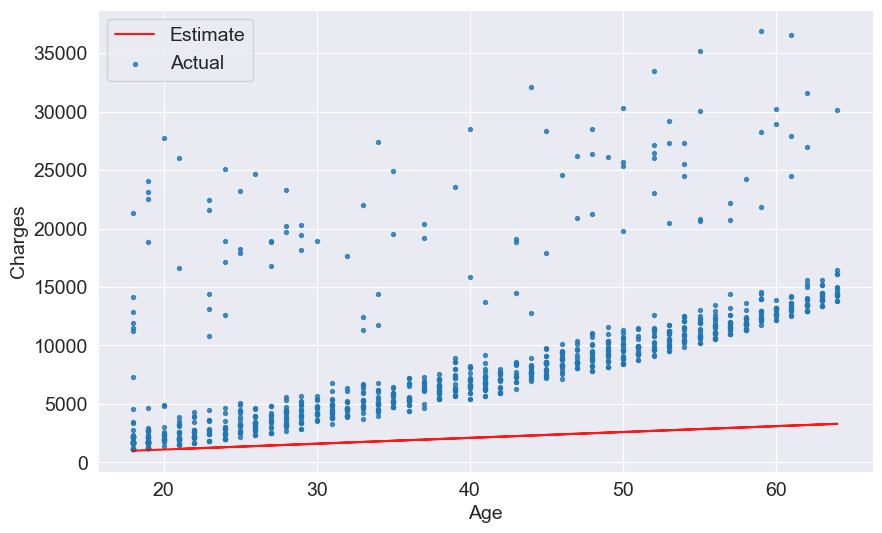

In [38]:
# Lost / Cost function: A function to compare our model's predictions with actual target.
# RMSE: the lower the lost, the better the model.
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

w = 50
b = 100
try_parameters(w,b)

In [39]:
targets = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predictions)

8461.949562575493

RMSE Loss:  7913.253965893368


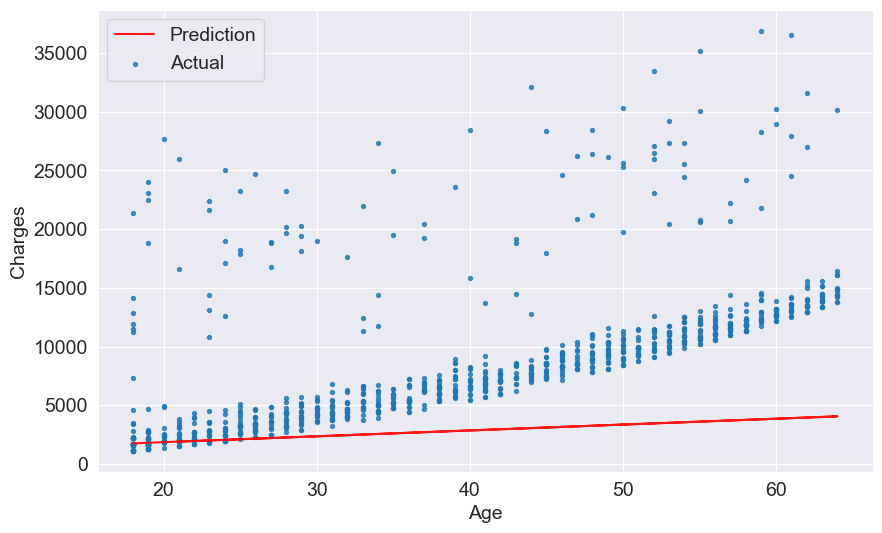

In [40]:
# Now, modify the function by directly input w and b, to get its loss.
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

try_parameters(50, 850)

# **Optimizer**

**Optimizer**: A strategy to modify w and b to reduce the loss, lets line more fit to our data.

**Ordinary Least Squares**: directly computes the best values for w and b using matrix operations, which is better for smaller datasets.

**Stochastic gradient descent:** Use an iterative approach, starting with a random values of w and b, slowly improving them using derivatives. (better for larger datasets)

# **Linear Regression For Ordinary Least Squares using Scikit-Learn**

In [41]:
# Practise For Ordinary Least Squares using Scikit-Learn to find the best fit line
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit our model to find the best fit line for inputs and targets.
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [42]:
# Parameters
# X : shape (n_samples, n_features)
# Y : shape (n_samples,) or (n_samples, n_targets)

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

# notice that, we pass a list [['age]], but not a single column ['age'], as input X must be a 2-d array,
# so you must pass a list, but can only one element in the list.

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [43]:
# Fits the model to the data
model.fit(inputs, targets)

LinearRegression()

In [44]:
# Try to predict the charges of age with 23, 37, 61
model.predict(np.array([[23],
                        [37],
                        [61]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [45]:
# Compute the predictions for entire datasets
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [46]:
# Compute the RMSE loss function to evaluate the model
rmse(targets, predictions)

# it is not that bad as we still got some outliers

4662.505766636395

In [47]:
# Model parameters stored in  coef_ and intercept_ properties
print(model.coef_, model.intercept_)

[267.24891283] -2091.420556565021


RMSE Loss:  4662.505766636395


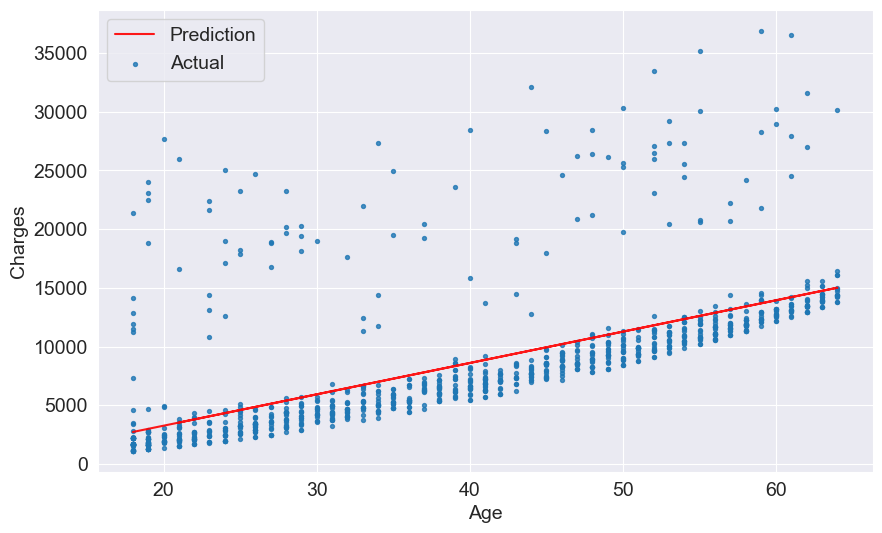

In [48]:
# Visualize them
try_parameters(model.coef_, model.intercept_)

# SGD Regressor from Scikit-Learn (Stochastic Gradient Descent)
*   Train model using stochastic gradient descent to make predictions and compute


In [49]:
# SGD is an iterative method that updates weights based on small batches of data,
# which can produce different results compared to ordinary least squares due to its approximate nature.
# Import SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the inputs and targets
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

# Initialize SGDRegressor with suitable parameters
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the SGDRegressor model
sgd_model.fit(inputs, targets)

# Make predictions
sgd_predictions = sgd_model.predict(inputs)
print(sgd_predictions)

[3247.90336454 5115.03762768 6048.60475925 ... 3247.90336454 3247.90336454
 3808.04364348]


In [50]:
# Calculate RMSE
sgd_rmse = np.sqrt(mean_squared_error(targets, sgd_predictions))

# Display results
print("SGD Coefficient:", sgd_model.coef_)
print("SGD Intercept:", sgd_model.intercept_)
print("SGD RMSE Loss:", sgd_rmse)
print('--------------------------------------')
# Compare with OLS results
print("OLS Coefficient:", model.coef_)
print("OLS Intercept:", model.intercept_)

SGD Coefficient: [186.71342631]
SGD Intercept: [-112.93830912]
SGD RMSE Loss: 4944.5404657566505
--------------------------------------
OLS Coefficient: [267.24891283]
OLS Intercept: -2091.420556565021


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = medical_df

# Filter for smoker data
smoker_df = df[df['smoker'] == 'yes']

# Define inputs and targets
inputs = smoker_df[['age']]
targets = smoker_df['charges']

# Train the linear regression model
# Initialize the model
model_smoker = LinearRegression()

# Fit the model
model_smoker.fit(inputs, targets)

# Make predictions
predictions_smoker = model_smoker.predict(inputs)

# Calculate RMSE
rmse_smoker = np.sqrt(mean_squared_error(targets, predictions_smoker))

# Display the results
print("Coefficients:", model_smoker.coef_)
print("Intercept:", model_smoker.intercept_)
print("RMSE for smokers:", rmse_smoker)

Coefficients: [305.23760211]
Intercept: 20294.12812691597
RMSE for smokers: 10711.00334810241


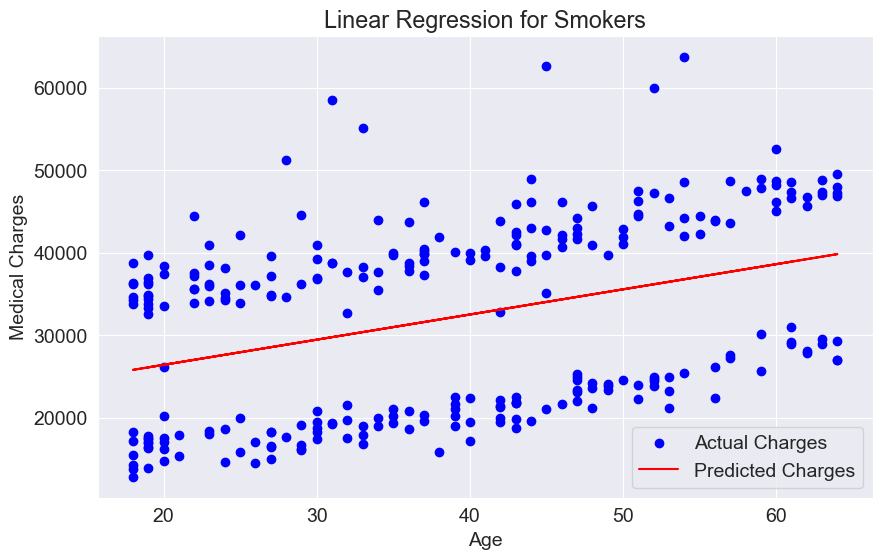

In [52]:
# Visualize the target and predictions
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(inputs, targets, color='blue', label='Actual Charges')

# Line plot of predictions
plt.plot(inputs, predictions_smoker, color='red', label='Predicted Charges')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Linear Regression for Smokers')
plt.legend()

# Show the plot
plt.show()


# **Linear Regression using Multiple Features**

Currently we already done for single features, like how to use single feature 'age' to predict charges for smoker, now adding more features for it.

Formula: charges = w1 * age + w2 * bmi + b

In [53]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [54]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# We can see that adding bmi didn't reduce the loss, its because bmi has a weak correlation with charges, especially for non-smokers.
corr = non_smoker_df.charges.corr(non_smoker_df.bmi)
print('BMI corr:', corr)

Loss: 4662.3128354612945
BMI corr: 0.08403654312833271


In [55]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [56]:
# Visualize relationship between three variables using 3D scatter plot.
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [57]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488036)

In [58]:
# Add final numeric column: "children", which seems to have some correlation with "charges".
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [59]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [60]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# Reduce is greater than using bmi, but no a big reduction as well.

Loss: 4608.470405038246


Loss: 5718.202480524154


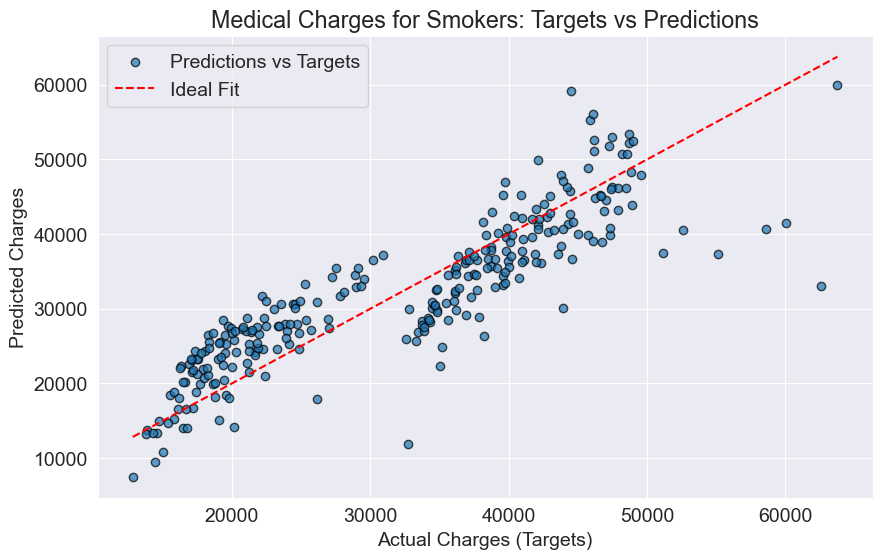

In [61]:
# Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers.
# Visualize the targets and predictions, and compute the loss.

df = medical_df

# Filter for smoker data
smoker_df = df[df['smoker'] == 'yes']

# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(targets, predictions, alpha=0.7, edgecolor='k', label='Predictions vs Targets')
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Medical Charges for Smokers: Targets vs Predictions')
plt.xlabel('Actual Charges (Targets)')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

Loss: 11355.317901125973


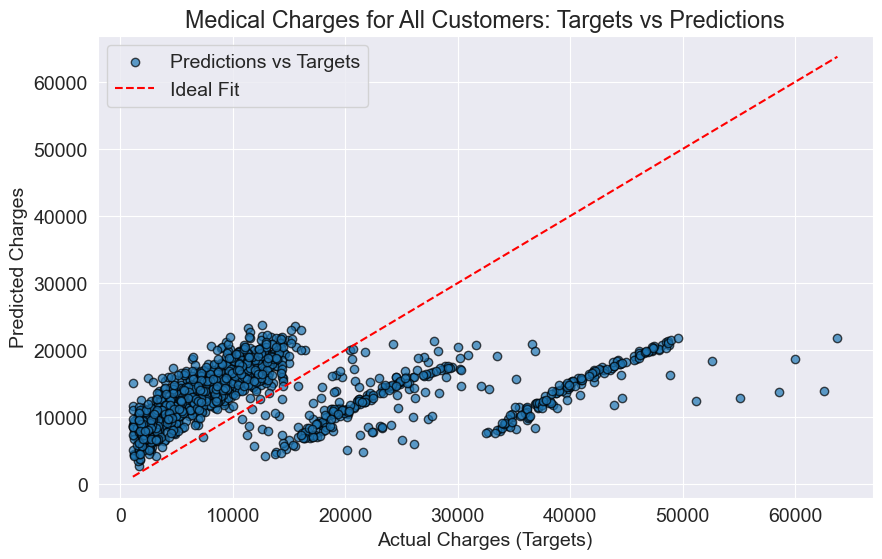

In [62]:
# Now train this model to estimate medical charges for all customers
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(targets, predictions, alpha=0.7, edgecolor='k', label='Predictions vs Targets')
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Medical Charges for All Customers: Targets vs Predictions')
plt.xlabel('Actual Charges (Targets)')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

# **Using Categorical Features for Machine Learning**
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:


*   If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
*   If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
*   If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

0.7872514304984778

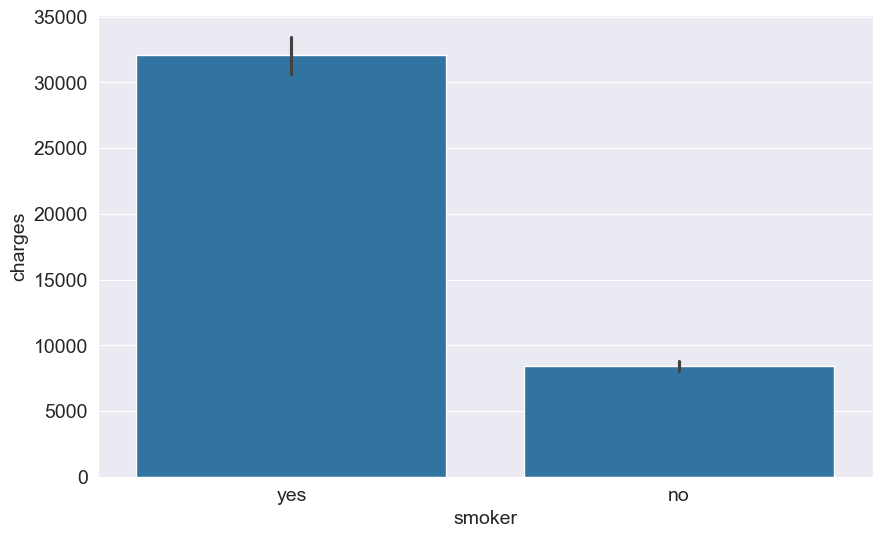

In [63]:
sns.barplot(data=medical_df, x='smoker', y='charges');

smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

medical_df.charges.corr(medical_df.smoker_code)

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [64]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# The loss reduces from 11355 to 6056, almost by 50%!
# This is an important lesson: never ignore categorical data.

Loss: 6056.439217188081


0.05729206220202533

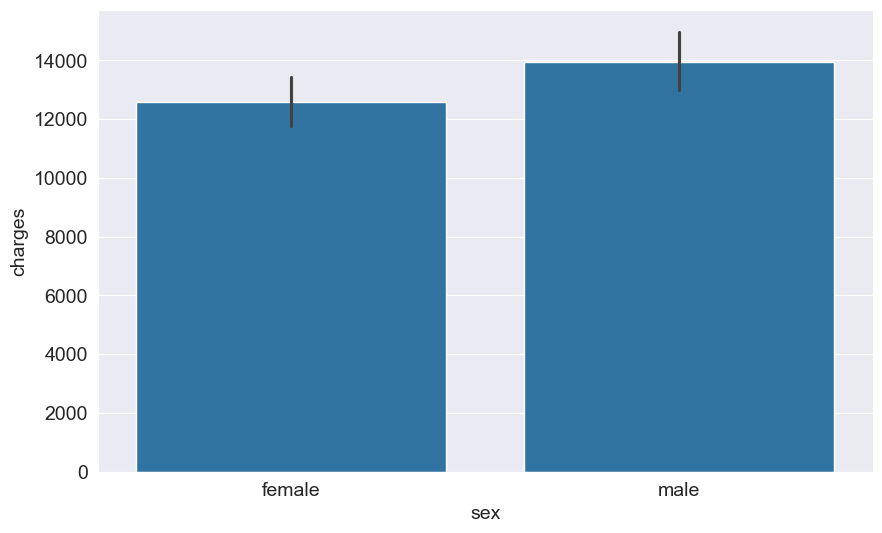

In [65]:
sns.barplot(data=medical_df, x='sex', y='charges')

sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

In [66]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546



### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

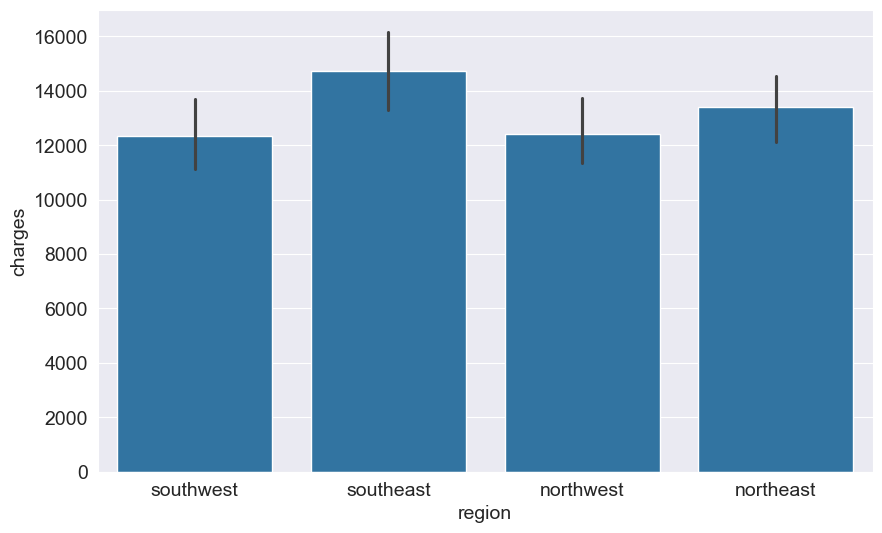

In [67]:
sns.barplot(data=medical_df, x='region', y='charges');

In [68]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [69]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [70]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [71]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [72]:
# Combined Model
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Train combined model
combined_model = LinearRegression().fit(inputs, targets)
combined_predictions = combined_model.predict(inputs)
combined_loss = rmse(targets, combined_predictions)
print('Combined Model Loss:', combined_loss)

# Separate Models
# Smokers
smoker_df = medical_df[medical_df['smoker_code'] == 1]
smoker_inputs, smoker_targets = smoker_df[input_cols], smoker_df['charges']
smoker_model = LinearRegression().fit(smoker_inputs, smoker_targets)
smoker_predictions = smoker_model.predict(smoker_inputs)
smoker_loss = rmse(smoker_targets, smoker_predictions)
print('Smoker Model Loss:', smoker_loss)

# Non-Smokers
non_smoker_df = medical_df[medical_df['smoker_code'] == 0]
non_smoker_inputs, non_smoker_targets = non_smoker_df[input_cols], non_smoker_df['charges']
non_smoker_model = LinearRegression().fit(non_smoker_inputs, non_smoker_targets)
non_smoker_predictions = non_smoker_model.predict(non_smoker_inputs)
non_smoker_loss = rmse(non_smoker_targets, non_smoker_predictions)
print('Non-Smoker Model Loss:', non_smoker_loss)

# Combined Loss for Separate Models
total_loss = (smoker_loss * len(smoker_targets) + non_smoker_loss * len(non_smoker_targets)) / len(targets)
print('Weighted Loss for Separate Models:', total_loss)


Combined Model Loss: 6041.6796511744515
Smoker Model Loss: 5668.4678821121515
Non-Smoker Model Loss: 4573.074988795493
Weighted Loss for Separate Models: 4797.393114930593


In [73]:
# input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
model.predict([[28,30,2,1,0,0,1,0,0]])

# Which means a patient with these information will estimate to pay for this charge.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

# **Model Improvement**

# **Feature Scaling**
So now, we know that our model says around 30000 of payment, but you need to explain why it charges a patient for 30000, you can't hide behind the model and say that's model say.


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$


In [74]:
# To compare the importance of each feature in the model, our first instinct might be to compare their weights.
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [75]:
model.intercept_

-12525.547811195473

In [76]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


**Standardization**

We will found some issues as different variables have different ranges.
1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs like bmi is (15-40), which is far more large than northwest (0-1), will affect the loss and dominate the optimization process.

For this reason, we need standardization to scaling or standardize the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)


In [77]:
# Apply scaling using the StandardScaler class
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

mean = scaler.mean_
variants = scaler.var_
print('Mean:', mean, 'Variants:', variants)
# Variants is the square of standard deviations.

Mean: [39.20702541 30.66339686  1.09491779] Variants: [197.25385199  37.16008997   1.45212664]


In [78]:
# Scale data as follows:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [79]:
# Combined with categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [80]:
# Compare the weight in the formula
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

# The most important features are smoker, age and bmi.

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


# **Train and testing dataset**

In [81]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.4)

# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Test Loss: 5959.415583609818
Training Loss: 6119.458236970259


# **Pickling the model**


In [82]:
import pickle 

# Save the model as a pickle file
with open("regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

# Load the model from the pickle file
with open("regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
X_test = np.array([[28,30,2,1,0,0,1,0,0]])
prediction = loaded_model.predict(X_test)

print("Prediction for input 6:", prediction[0])

Model saved successfully!
Prediction for input 6: 200672.0
